# Tutorial for `PICASA` results analysis using normal pancreas dataset.




First, we read the model results file generated following the picasa model training tutorial (previously described as tutorial 1).

In [10]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

############################
sample = 'pancreas' 
wdir = '/home/BCCRC.CA/ssubedi/projects/experiments/picasa/picasa_reproducibility/analysis/'+sample

############ read model results as adata 
picasa_adata = ad.read_h5ad(wdir+'/model_results/picasa.h5ad')
wdir = wdir + '/notebooks/'


Now, we extract all three representations - common, unique, and base latent spaces learned by the model. 

In [1]:


df = pd.DataFrame(index=picasa_adata.obs.index)

sc.pp.neighbors(picasa_adata,use_rep='common')
sc.tl.umap(picasa_adata)
df[['c_umap1','c_umap2']] = picasa_adata.obsm['X_umap']

sc.pp.neighbors(picasa_adata,use_rep='unique')
sc.tl.umap(picasa_adata)
df[['u_umap1','u_umap2']] = picasa_adata.obsm['X_umap']

sc.pp.neighbors(picasa_adata,use_rep='base')
sc.tl.umap(picasa_adata)
df[['b_umap1','b_umap2']] = picasa_adata.obsm['X_umap']

df['batch']=picasa_adata.obs['batch']
df['celltype']=picasa_adata.obs['celltype']


Plot all umaps.

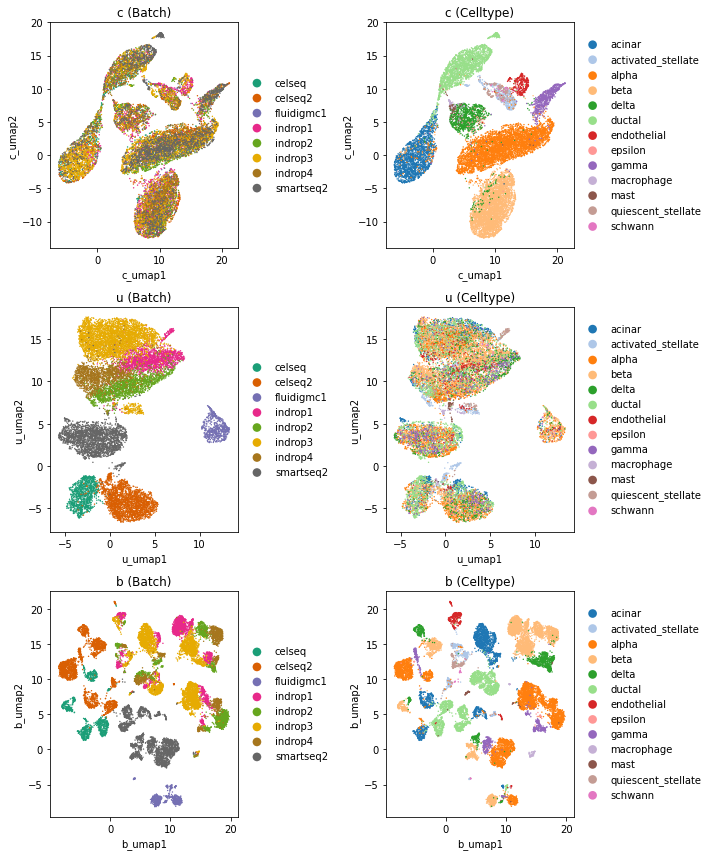

In [14]:
adata = sc.AnnData(df.iloc[:,:6])
adata.obs['batch'] = df['batch'].astype('category')
adata.obs['celltype'] = df['celltype'].astype('category')

umap_pairs = [('c_umap1', 'c_umap2'), ('u_umap1', 'u_umap2'), ('b_umap1', 'b_umap2')]


color_palette_ct = sns.color_palette("tab20", len(adata.obs['celltype'].unique()))
color_palette_b = sns.color_palette("Dark2", len(adata.obs['batch'].unique()))

extra_colors = sns.color_palette("Set1", 5)  # Get 5 extra colors
color_palette_b += extra_colors
    
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

for i, (umap_x, umap_y) in enumerate(umap_pairs):
    sc.pl.scatter(adata, x=umap_x, y=umap_y, color='batch', palette= color_palette_b,ax=axes[i, 0], show=False)
    axes[i, 0].set_title(f"{umap_x[0]} (Batch)")

    sc.pl.scatter(adata, x=umap_x, y=umap_y,color = 'celltype',palette=color_palette_ct, ax=axes[i, 1], show=False)
    
    axes[i, 1].set_title(f"{umap_x[0]} (Celltype)")

plt.tight_layout()
plt.show()